# Distribution of MW ranks of congruent number elliptic curves. 

The notebook contains code to empirically study distribution of MW rank. There are no explicit reults regarding these distribution in the literature, except, of course due to Heath-Brown, which are derived from the distribution of Selmer ranks. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("mwranks_3mil.csv", usecols=['n', 'mwrank', 'mod8'])
df = df[df['mwrank'] != -1]
df.rename(columns={'mwrank': 'rank'}, inplace=True)
df

,n,rank,mod8
0,1,0,1
1,2,0,2
2,3,0,3
3,5,1,5
4,6,1,6
...,...,...,...
1823768,2999991,1,7
1823769,2999993,0,1
1823770,2999995,0,3
1823771,2999998,1,6


Computation of Empirical Moments

In [2]:
for k in [1, 2, 3]:
    moment = (df['rank'] ** k).mean()
    print(f"Empirical moment of order {k} of MW rank: {moment:.5f}")

Empirical moment of order 1 of MW rank: 0.55995
Empirical moment of order 2 of MW rank: 0.64656
Empirical moment of order 3 of MW rank: 0.82514


In [3]:
df['size'] = 2 ** (df['rank'])
for k in [1, 2, 3, 4]:
    moment = (df['size'] ** k).mean()
    print(f"Empirical moment of order {k} of 2^ MW rank: {moment:.5f}")

Empirical moment of order 1 of 2^ MW rank: 1.60416
Empirical moment of order 2 of 2^ MW rank: 3.09475
Empirical moment of order 3 of 2^ MW rank: 7.37791
Empirical moment of order 4 of 2^ MW rank: 22.77979


**Parity of MW Rank vs. mod 8 Residue**


Test empirically if:

    Even ranks dominate for some residues

    Odd ranks dominate for others

rank_parity    0    1
mod8                 
1            1.0  0.0
2            1.0  0.0
3            1.0  0.0
5            0.0  1.0
6            0.0  1.0
7            0.0  1.0


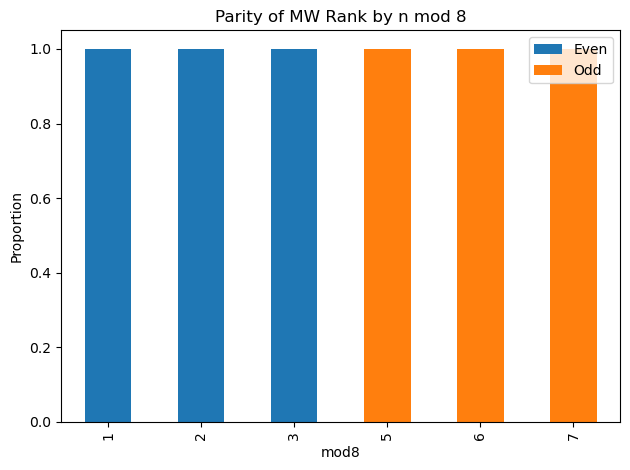

In [4]:
df['rank_parity'] = df['rank'] % 2

# Parity distribution by mod 8 residue
parity_by_mod8 = df.groupby('mod8')['rank_parity'].value_counts(normalize=True).unstack().fillna(0)
print(parity_by_mod8)

# Optional: plot
import matplotlib.pyplot as plt

parity_by_mod8.plot(kind='bar', stacked=True)
plt.ylabel("Proportion")
plt.title("Parity of MW Rank by n mod 8")
plt.legend(["Even", "Odd"])
plt.tight_layout()
plt.show()


**Histogram of MW Ranks**

Visualize how Selmer ranks are distributed. Heath-Brown predicts a tail but very few values beyond rank 4.

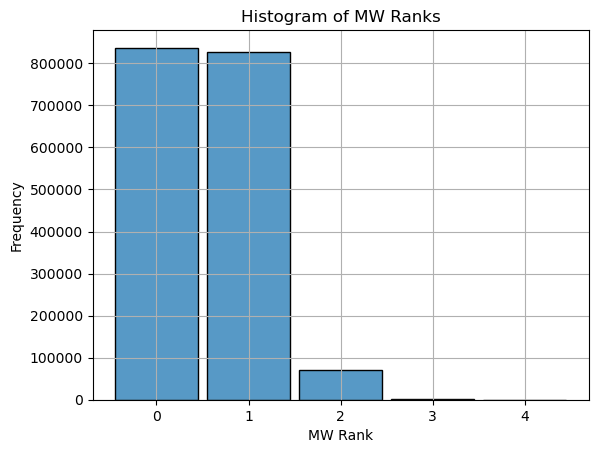

In [5]:
sns.histplot(df['rank'], discrete=True, shrink=0.9)
plt.title("Histogram of MW Ranks")
plt.xlabel("MW Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("mwr_frequency.jpeg")
plt.show()

**Verification of Corollary 3 of HB's first paper** When s(D) and r(D) have the same parity then for any odd integer the average s(D) is at most 4/3. Conequently, s(D) = 0 for at least 1/3 of D that are 1 or 3 (8) and s(D) = 1 for 5/6 of D that are 5 or 7 (8). See also Theorem 2 of the part 2 paper. 

In [9]:
filter_df = df[df['mod8'].isin([1,3])]
avg1 = (filter_df['rank']).mean()
prp1 = (filter_df['rank'] == 0).mean()
print("Average r(D) when D is 1 or 3 (mod 8) =", avg1, "Proportion of numbers with r(D) = 0 is", prp1)

filter_df = df[df['mod8'].isin([5,7])]
avg2 = (filter_df['rank']).mean()
prp2 = (filter_df['rank'] == 1).mean()
print("Average r(D) when D is 5 or 7 (mod 8) =", avg2, "Proportion of numbers with r(D) = 1 is", prp2)

Average r(D) when D is 1 or 3 (mod 8) = 0.18149875391714165 Proportion of numbers with r(D) = 0 is 0.9092901028943667
Average r(D) when D is 5 or 7 (mod 8) = 1.0071058124558971 Proportion of numbers with r(D) = 1 is 0.9964470937720514


**Conditional Moments by Residue mod 8**

We compute average rank across residue classes. 

          mean   count
mod8                  
1     0.170107  301962
2     0.169015  302529
3     0.127843  303153
5     1.002960  275026
6     1.005074  276320
7     1.002631  275936


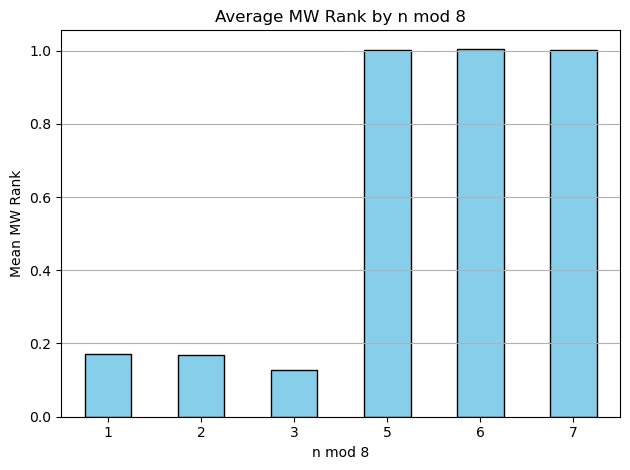

In [15]:
# Group by mod 8 residue and compute mean 2-Selmer rank and count
conditional_moments = df.groupby('mod8')['rank'].agg(['mean', 'count']).sort_index()

# Display the table
print(conditional_moments)

# Plot: mean MW rank by residue mod 8
conditional_moments['mean'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average MW Rank by n mod 8")
plt.xlabel("n mod 8")
plt.ylabel("Mean MW Rank")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


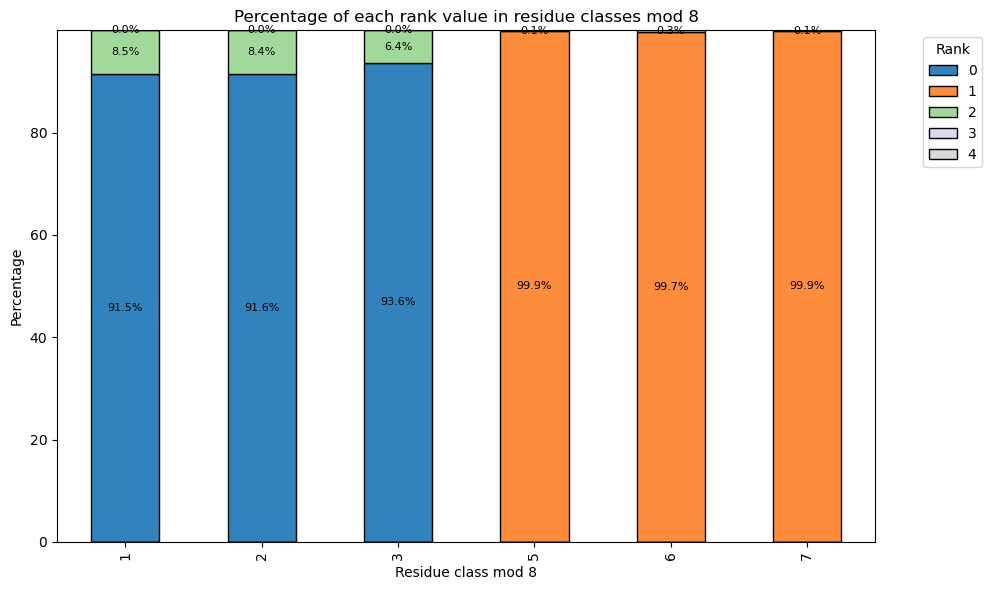

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Read dataframe from CSV
# df = pd.read_csv("your_file.csv")
# Assuming df has columns: 'n', 'mod8', 'rank'

# Group by mod8 and rank, then count occurrences
counts = df.groupby(['mod8', 'rank']).size().unstack(fill_value=0)

# Convert counts to percentages within each mod8 class
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), 
                      colormap='tab20c', edgecolor='black')

plt.ylabel("Percentage")
plt.xlabel("Residue class mod 8")
plt.title("Percentage of each rank value in residue classes mod 8")
plt.legend(title="Rank", bbox_to_anchor=(1.05, 1), loc='upper left')
# Add percentage labels on each segment
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha='center', va='center',
                fontsize=8, color='black'
            )
plt.tight_layout()
plt.savefig("rank_distribution.jpeg")
plt.show()


**The empirical PMF (probability mass function) of the MW rank distribution**

In [9]:
# Compute empirical PMF
empirical_pmf = df['rank'].value_counts(normalize=True).sort_index()
print("Empirical PMF of MW Rank:")
print(empirical_pmf)

Empirical PMF of MW Rank:
rank
0    0.482463
1    0.475992
2    0.040685
3    0.000848
4    0.000012
Name: proportion, dtype: float64


In [11]:
odd_df =  df[df['mod8'].isin([1,3,5,7])]
odd_df['group'] = odd_df['mod8'].map(lambda x: '1_3' if x in [1, 3] else '5_7')

odd_df

/tmp/ipykernel_101375/2729441894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odd_df['group'] = odd_df['mod8'].map(lambda x: '1_3' if x in [1, 3] else '5_7')


,n,rank,mod8,size,rank_parity,group
0,1,0,1,1,0,1_3
2,3,0,3,1,0,1_3
3,5,1,5,2,1,5_7
5,7,1,7,2,1,5_7
7,11,0,3,1,0,1_3
...,...,...,...,...,...,...
1823766,2999989,1,5,2,1,5_7
1823768,2999991,1,7,2,1,5_7
1823769,2999993,0,1,1,0,1_3
1823770,2999995,0,3,1,0,1_3


Validation of Corollary 3: Tail Probabilities
Residue      r          Empirical Prop  Theoretical Bound Total D   
D ≡ 1,3 mod8 0          1.000000        1.731300        605115    
D ≡ 1,3 mod8 2          0.074454        0.865650                  
D ≡ 1,3 mod8 4          0.000013        0.027052                  

D ≡ 5,7 mod8 1          1.000000        1.731300        550962    
D ≡ 5,7 mod8 3          0.001398        0.216413                  



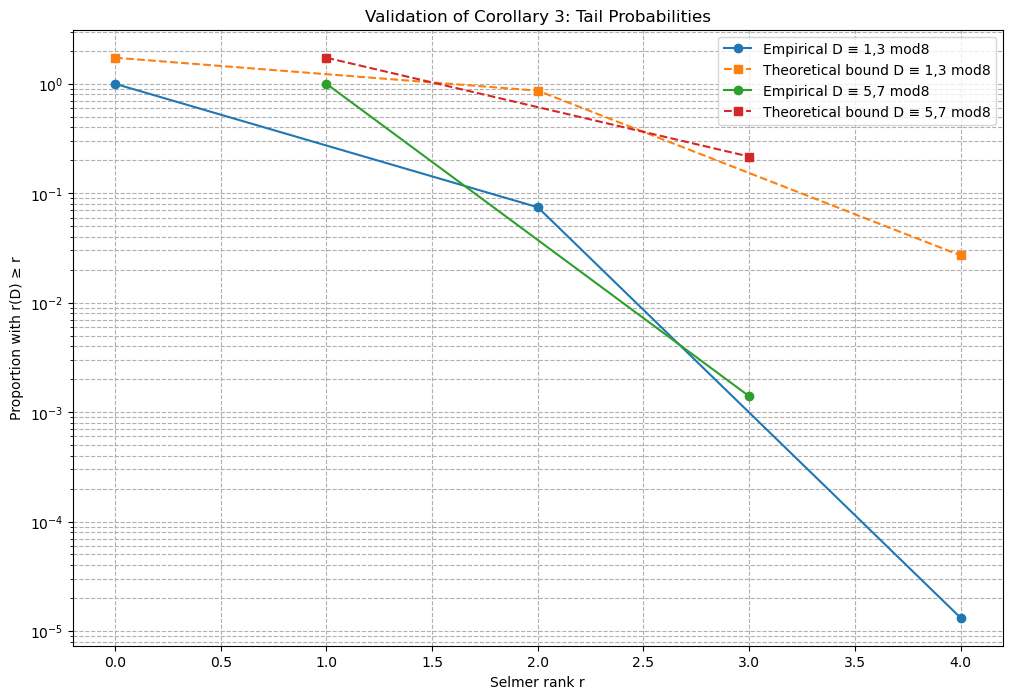

In [16]:
def validate_corollary3(df):
    # Theoretical upper bound from Corollary 3
    C = 1.7313  # The constant from the paper
    
    results = {
        '1,3': {'name': 'D ≡ 1,3 mod8', 'hs': [1, 3], 'start_r': 0, 'step': 2},
        '5,7': {'name': 'D ≡ 5,7 mod8', 'hs': [5, 7], 'start_r': 1, 'step': 2}
    }
    
    for group in results.values():
        # Combine data for both residue classes in group
        subset = df[df['mod8'].isin(group['hs'])]
        total = len(subset)
        
        r_values = []
        empirical_props = []
        theoretical_bounds = []
        
        max_r = max(subset['rank'])
        
        for r in range(group['start_r'], max_r + 1, group['step']):
            count = len(subset[subset['rank'] >= r])
            prop = count / total
            bound = C * (2)**(-(r**2 - r)/2)
            
            r_values.append(r)
            empirical_props.append(prop)
            theoretical_bounds.append(bound)
        
        group.update({
            'r': r_values,
            'empirical': empirical_props,
            'theoretical': theoretical_bounds,
            'total': total
        })
    
    # Print results in a table
    print("Validation of Corollary 3: Tail Probabilities")
    print("{:<12} {:<10} {:<15} {:<15} {:<10}".format(
        "Residue", "r", "Empirical Prop", "Theoretical Bound", "Total D"))
    
    for group in results.values():
        for i, r in enumerate(group['r']):
            print("{:<12} {:<10} {:<15.6f} {:<15.6f} {:<10}".format(
                group['name'],
                r,
                group['empirical'][i],
                group['theoretical'][i],
                group['total'] if i == 0 else ""  # Only print total once per group
            ))
        print()  # Add empty line between groups
    
    # Plot results in normal scale
    plt.figure(figsize=(12, 8))
    
    for group in results.values():
        plt.plot(group['r'], group['empirical'], 'o-', 
                label=f'Empirical {group["name"]}')
        plt.plot(group['r'], group['theoretical'], 's--', 
                label=f'Theoretical bound {group["name"]}')
    plt.yscale('log')
    plt.xlabel('Selmer rank r')
    plt.ylabel('Proportion with r(D) ≥ r')
    plt.title('Validation of Corollary 3: Tail Probabilities')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    
    # Add text annotation about the constant C
    '''plt.annotate(f'Note: Theoretical bound is C·2^(-(r²-r)/2) with C ≈ {C}',
                xy=(0.5, 0.95), xycoords='axes fraction',
                ha='center', va='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))'''
    
    plt.savefig("mwrtrailp.jpeg")
    plt.show()
    
    return results

corollary1_results = validate_corollary3(odd_df)

In [17]:
#Corollary 4
theoretical_mean = {'1_3': 1.2039, '5_7': 1.3250}

means = odd_df.groupby('group')['rank'].mean().reset_index()
means['Theoretical'] = means['group'].map(theoretical_mean)

print(means)

  group      rank  Theoretical
0   1_3  0.148934       1.2039
1   5_7  1.002795       1.3250


In [18]:
def validate_corollary4(df):
    # Theoretical constants from Corollary 2
    c_prime = 1.2039  # For h=1,3
    c_double_prime = 1.3250  # For h=5,7
    
    results = {}
    
    for h in [1, 3, 5, 7]:
        subset = df[df['mod8'] == h]
        avg_sofd = subset['rank'].mean()
        
        theoretical_avg = c_prime if h in [1, 3] else c_double_prime
        
        results[h] = {
            'empirical_avg': avg_sofd,
            'theoretical_avg': theoretical_avg,
            'count': len(subset)
        }
    
    # Print results
    print("Validation of Corollary 4: Average MW Ranks")
    print("{:<10} {:<15} {:<15} {:<10}".format(
        "D mod8", "Empirical Avg", "Theoretical Avg", "Count"))
    
    for h in sorted(results.keys()):
        print("{:<10} {:<15.4f} {:<15.4f} {:<10}".format(
            h, 
            results[h]['empirical_avg'], 
            results[h]['theoretical_avg'],
            results[h]['count']))
    
    return results

corollary4_results = validate_corollary4(odd_df)

Validation of Corollary 4: Average MW Ranks
D mod8     Empirical Avg   Theoretical Avg Count     
1          0.1701          1.2039          301962    
3          0.1278          1.2039          303153    
5          1.0030          1.3250          275026    
7          1.0026          1.3250          275936    
